In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/CCC_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_prediction
0,2,Masters Men 1 (40-49),Male,10.436679,12.416371,10.200935,13.011486
1,3,Senior Men (23-39),Male,18.033282,13.945114,12.960100,15.386507
2,4,Senior Men (23-39),Male,17.350464,12.670525,13.933041,15.058385
3,27,Senior Men (23-39),Male,13.967962,14.156088,14.225135,15.640781
4,28,Senior Men (23-39),Male,15.438115,17.071479,11.159074,16.087928


In [4]:
df = df.dropna()

# All

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_prediction))

print('Best Error:', abestpb)
print('Mean Error:', ameanpb)


Best Error: 3.7614761129503913
Mean Error: 1.5204534615676308


# Male

In [7]:
male = df[df.gender == 'Male']

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mbestpb = sqrt(mean_squared_error(male.query_pb, male.best_pb_prediction))
mmeanpb = sqrt(mean_squared_error(male.query_pb, male.mean_pb_prediction))

print('Male Best Error:', mbestpb)
print('Male Mean Error:', mmeanpb)

Male Best Error: 3.763111509989442
Male Mean Error: 1.514867825110446


# Female

In [9]:
female = df[df.gender == 'Female']

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

fbestpb = sqrt(mean_squared_error(female.query_pb, female.best_pb_prediction))
fmeanpb = sqrt(mean_squared_error(female.query_pb, female.mean_pb_prediction))

print('Female Best Error:', fbestpb)
print('Female Mean Error:', fmeanpb)

Female Best Error: 3.739950254543068
Female Mean Error: 1.591933079751041


In [11]:
mean = [ameanpb, mmeanpb, fmeanpb]
best = [abestpb, mbestpb, fbestpb]

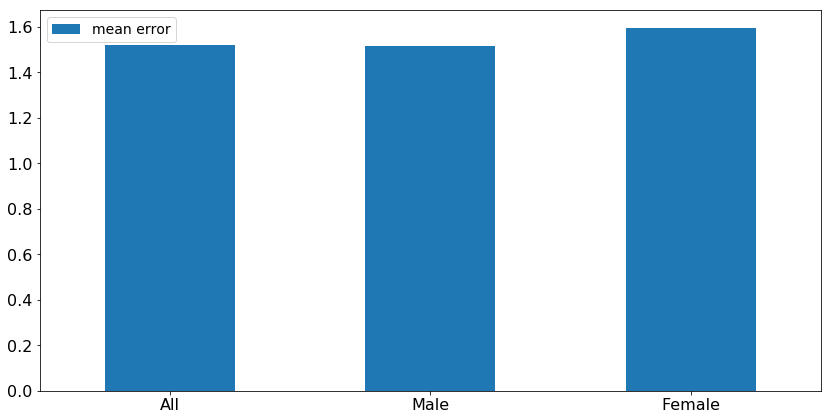

In [12]:
index = ['All', 'Male', 'Female']
gra = pd.DataFrame({'mean error': mean}, index=index)
ax = gra.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

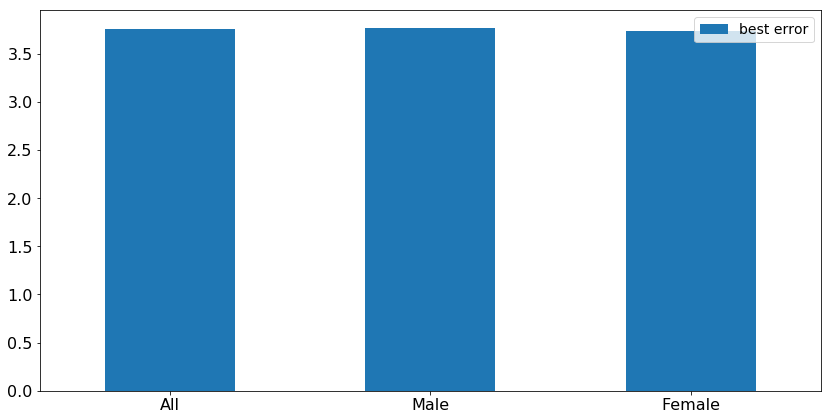

In [13]:
index = ['All', 'Male', 'Female']
gra2 = pd.DataFrame({'best error': best}, index=index)
ax = gra2.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

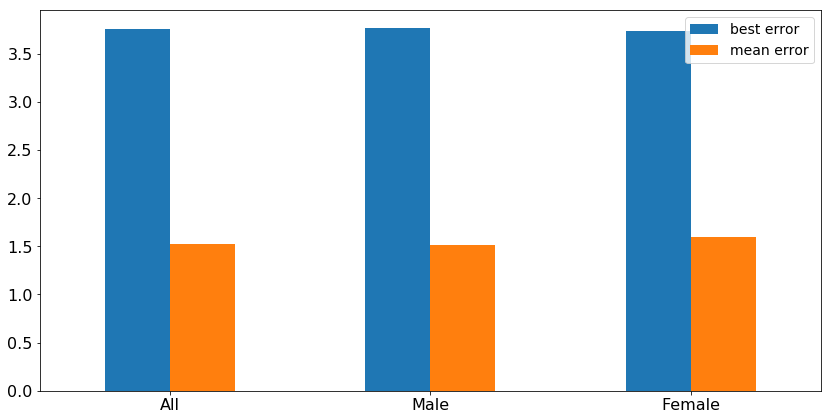

In [14]:
index = ['All', 'Male', 'Female']
gra1 = pd.DataFrame({'mean error': mean, 'best error': best}, index=index)
ax = gra1.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

# Categories

In [15]:
sen = df[df.category == 'Senior Men (23-39)']

mas = df[df.category == 'Masters Men 1 (40-49)']

mas2 = df[df.category == 'Masters Men 2 (50-59)']

mas3 = df[df.category == 'Masters Men 3 (60-69)']

wom1 = df[df.category == 'Masters Women 1 (40-49)']

wom2 = df[df.category == 'Masters Women 2 (50-59)']

senW = df[df.category == 'Senior Women (23-39)']

you = df[df.category == 'Youth Men (20-22)']

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

snrB = sqrt(mean_squared_error(sen.query_pb, sen.best_pb_prediction))
snrM = sqrt(mean_squared_error(sen.query_pb, sen.mean_pb_prediction))

mas1B = sqrt(mean_squared_error(mas.query_pb, mas.best_pb_prediction))
mas1M = sqrt(mean_squared_error(mas.query_pb, mas.mean_pb_prediction))

mas2B = sqrt(mean_squared_error(mas2.query_pb, mas2.best_pb_prediction))
mas2M = sqrt(mean_squared_error(mas2.query_pb, mas2.mean_pb_prediction))

mas3B = sqrt(mean_squared_error(mas3.query_pb, mas3.best_pb_prediction))
mas3M = sqrt(mean_squared_error(mas3.query_pb, mas3.mean_pb_prediction))

wom1B = sqrt(mean_squared_error(wom1.query_pb, wom1.best_pb_prediction))
wom1M = sqrt(mean_squared_error(wom1.query_pb, wom1.mean_pb_prediction))

wom2B = sqrt(mean_squared_error(wom2.query_pb, wom2.best_pb_prediction))
wom2M = sqrt(mean_squared_error(wom2.query_pb, wom2.mean_pb_prediction))

senWB = sqrt(mean_squared_error(senW.query_pb, senW.best_pb_prediction))
senWM = sqrt(mean_squared_error(senW.query_pb, senW.mean_pb_prediction))

youB = sqrt(mean_squared_error(you.query_pb, you.best_pb_prediction))
youM = sqrt(mean_squared_error(you.query_pb, you.mean_pb_prediction))

print('Senior Men Best Error:', snrB)
print('Senior Men Mean Error:', snrM)
print('Master 1 Best Error:', mas1B)
print('Master 1 Mean Error:', mas1M)
print('Master 2 Best Error:', mas2B)
print('Master 2 Mean Error:', mas2M)
print('Master 3 Best Error:', mas3B)
print('Master 3 Mean Error:', mas3M)
print('Master Women 1 Best Error:', wom1B)
print('Master Women 1 Mean Error:', wom1M)
print('Master Women 2 Best Error:', wom2B)
print('Master Women 2 Mean Error:', wom2M)
print('Senior Women Best Error:', senWB)
print('Senior Women Mean Error:', senWM)
print('Youth Men Best Error:', youB)
print('Youth Men Mean Error:', youM)

Senior Men Best Error: 3.6917774242499015
Senior Men Mean Error: 1.5439389187400834
Master 1 Best Error: 3.914387697470052
Master 1 Mean Error: 1.551219490235009
Master 2 Best Error: 3.5462657156243362
Master 2 Mean Error: 1.2636064628922097
Master 3 Best Error: 2.9741456943357387
Master 3 Mean Error: 1.7903593438306986
Master Women 1 Best Error: 3.872041836747429
Master Women 1 Mean Error: 1.6383498749347356
Master Women 2 Best Error: 2.9662791394519354
Master Women 2 Mean Error: 1.342400893775356
Senior Women Best Error: 3.7451155341352615
Senior Women Mean Error: 1.639347338850357
Youth Men Best Error: 3.0865608064538272
Youth Men Mean Error: 1.273604554689324


In [17]:
mean1 = [snrM, mas1M, mas2M, mas3M, wom1M, wom2M, senWM]
best1 = [snrB, mas1B, mas2B, mas3B, wom1B, wom2B, senWB]

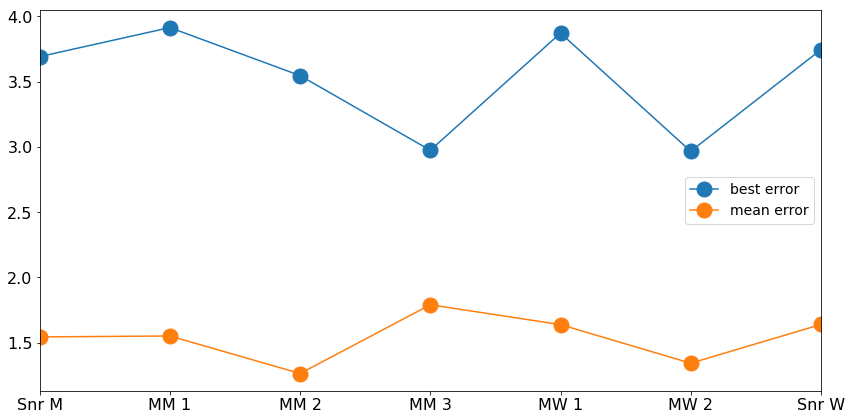

In [18]:
index = ['Snr M', 'MM 1', 'MM 2', 'MM 3', 'MW 1', 'MW 2', 'Snr W']
gra3 = pd.DataFrame({'mean error': mean1, 'best error': best1}, index=index)
ax = gra3.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Ability

In [19]:
g9 = df[(df.query_pb <= 9)]
g11 = df[(df.query_pb > 9) & (df.query_pb <= 11)]
g13 = df[(df.query_pb > 11) & (df.query_pb <= 13)]
g15 = df[(df.query_pb > 13) & (df.query_pb <= 15)]
g17 = df[(df.query_pb > 15) & (df.query_pb <= 17)]
g19 = df[(df.query_pb > 17)]

## Bin counts

In [20]:
g9count = g9.shape[0]
g11count = g11.shape[0]
g13count = g13.shape[0]
g15count = g15.shape[0]
g17count = g17.shape[0]
g19count = g19.shape[0]

In [21]:
count = [g9count, g11count, g13count, g15count, g17count, g19count]

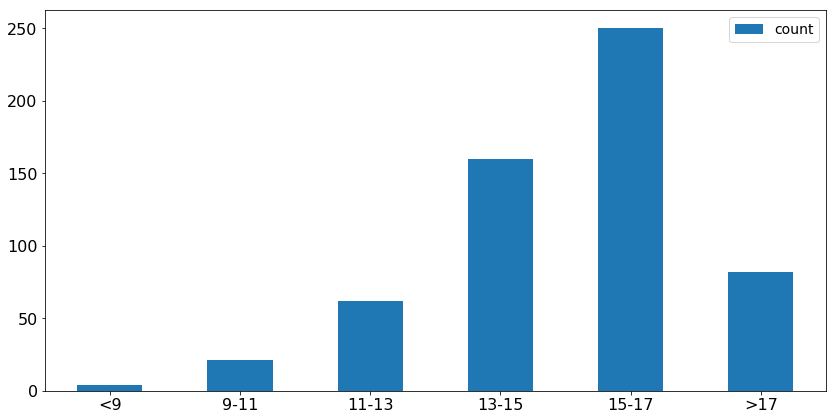

In [22]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

g9B = sqrt(mean_squared_error(g9.query_pb, g9.best_pb_prediction))
g9M = sqrt(mean_squared_error(g9.query_pb, g9.mean_pb_prediction))

g11B = sqrt(mean_squared_error(g11.query_pb, g11.best_pb_prediction))
g11M = sqrt(mean_squared_error(g11.query_pb, g11.mean_pb_prediction))

g13B = sqrt(mean_squared_error(g13.query_pb, g13.best_pb_prediction))
g13M = sqrt(mean_squared_error(g13.query_pb, g13.mean_pb_prediction))

g15B = sqrt(mean_squared_error(g15.query_pb, g15.best_pb_prediction))
g15M = sqrt(mean_squared_error(g15.query_pb, g15.mean_pb_prediction))

g17B = sqrt(mean_squared_error(g17.query_pb, g17.best_pb_prediction))
g17M = sqrt(mean_squared_error(g17.query_pb, g17.mean_pb_prediction))

g19B = sqrt(mean_squared_error(g19.query_pb, g19.best_pb_prediction))
g19M = sqrt(mean_squared_error(g19.query_pb, g19.mean_pb_prediction))


print('U9 Best Error:', g9B)
print('U9 Mean Error:', g9M)
print('9-11 Best Error:', g11B)
print('9-11 Mean Error:', g11M)
print('11-13 Best Error:', g13B)
print('11-13 Mean Error:', g13M)
print('13-15 Best Error:', g15B)
print('13-15 Mean Error:', g15M)
print('15-17 Best Error:', g17B)
print('15-17 Mean Error:', g17M)
print('O17 Best Error:', g19B)
print('017 Mean Error:', g19M)

U9 Best Error: 0.2078867863517597
U9 Mean Error: 2.6771533896506337
9-11 Best Error: 1.4376703119645027
9-11 Mean Error: 2.177212039291955
11-13 Best Error: 2.4892714159513245
11-13 Mean Error: 1.9666633085115006
13-15 Best Error: 3.0467592009920583
13-15 Mean Error: 1.3742484089125733
15-17 Best Error: 3.993011608328546
15-17 Mean Error: 1.000732356145155
O17 Best Error: 5.288120293294076
017 Mean Error: 2.257693836304346


In [24]:
mean2 = [g9M, g11M, g13M, g15M, g17M, g19M]
best2 = [g9B, g11B, g13B, g15B, g17B, g19B]

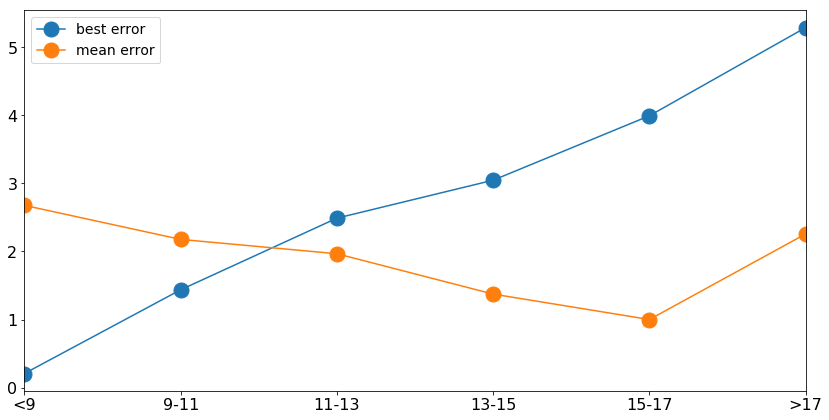

In [25]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra4 = pd.DataFrame({'mean error': mean2, 'best error': best2}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Male Ability

In [26]:
maleg9 = male[(male.query_pb <= 9)]
maleg11 = male[(male.query_pb > 9) & (male.query_pb <= 11)]
maleg13 = male[(male.query_pb > 11) & (male.query_pb <= 13)]
maleg15 = male[(male.query_pb > 13) & (male.query_pb <= 15)]
maleg17 = male[(male.query_pb > 15) & (male.query_pb <= 17)]
maleg19 = male[(male.query_pb > 17)]

## Bin counts

In [27]:
maleg9count = maleg9.shape[0]
maleg11count = maleg11.shape[0]
maleg13count = maleg13.shape[0]
maleg15count = maleg15.shape[0]
maleg17count = maleg17.shape[0]
maleg19count = maleg19.shape[0]

In [28]:
count1 = [maleg9count, maleg11count, maleg13count, maleg15count, maleg17count, maleg19count]

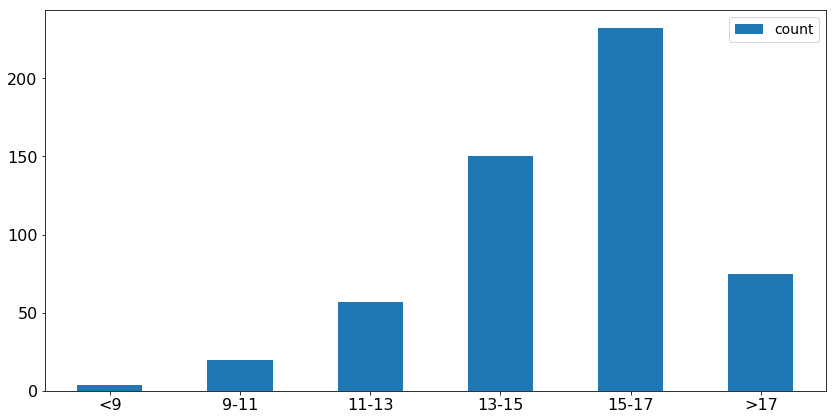

In [29]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra8 = pd.DataFrame({'count': count1}, index=index)
ax = gra8.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

maleg9B = sqrt(mean_squared_error(maleg9.query_pb, maleg9.best_pb_prediction))
maleg9M = sqrt(mean_squared_error(maleg9.query_pb, maleg9.mean_pb_prediction))

maleg11B = sqrt(mean_squared_error(maleg11.query_pb, maleg11.best_pb_prediction))
maleg11M = sqrt(mean_squared_error(maleg11.query_pb, maleg11.mean_pb_prediction))

maleg13B = sqrt(mean_squared_error(maleg13.query_pb, maleg13.best_pb_prediction))
maleg13M = sqrt(mean_squared_error(maleg13.query_pb, maleg13.mean_pb_prediction))

maleg15B = sqrt(mean_squared_error(maleg15.query_pb, maleg15.best_pb_prediction))
maleg15M = sqrt(mean_squared_error(maleg15.query_pb, maleg15.mean_pb_prediction))

maleg17B = sqrt(mean_squared_error(maleg17.query_pb, maleg17.best_pb_prediction))
maleg17M = sqrt(mean_squared_error(maleg17.query_pb, maleg17.mean_pb_prediction))

maleg19B = sqrt(mean_squared_error(maleg19.query_pb, maleg19.best_pb_prediction))
maleg19M = sqrt(mean_squared_error(maleg19.query_pb, maleg19.mean_pb_prediction))


print('Male U9 Best Error:', maleg9B)
print('Male U9 Mean Error:', maleg9M)
print('Male 9-11 Best Error:', maleg11B)
print('Male 9-11 Mean Error:', maleg11M)
print('Male 11-13 Best Error:', maleg13B)
print('Male 11-13 Mean Error:', maleg13M)
print('Male 13-15 Best Error:', maleg15B)
print('Male 13-15 Mean Error:', maleg15M)
print('Male 15-17 Best Error:', maleg17B)
print('Male 15-17 Mean Error:', maleg17M)
print('Male O17 Best Error:', maleg19B)
print('Male 017 Mean Error:', maleg19M)

Male U9 Best Error: 0.2078867863517597
Male U9 Mean Error: 2.6771533896506337
Male 9-11 Best Error: 1.4730828265240978
Male 9-11 Mean Error: 2.1087761631369424
Male 11-13 Best Error: 2.52233091929766
Male 11-13 Mean Error: 1.9683918822047668
Male 13-15 Best Error: 3.0138464523131803
Male 13-15 Mean Error: 1.382522179696207
Male 15-17 Best Error: 4.047928313045045
Male 15-17 Mean Error: 1.0274138227166054
Male O17 Best Error: 5.22612529491547
Male 017 Mean Error: 2.2047175415738085


In [31]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]

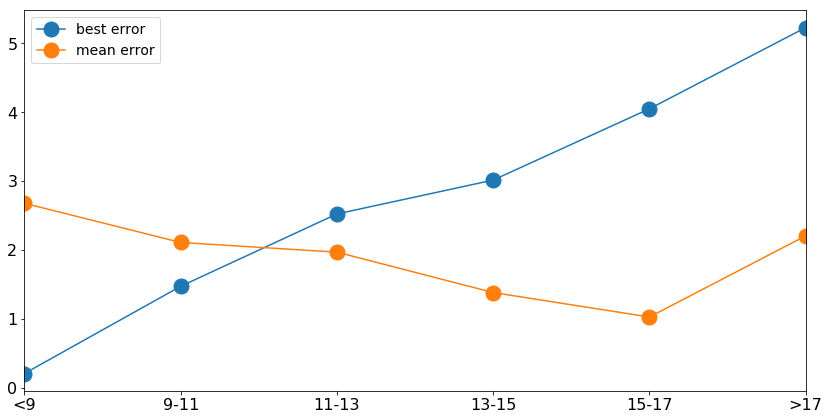

In [32]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'mean error': mean3, 'best error': best3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Female Ability

In [33]:
femaleg9 = female[(female.query_pb <= 9)]
femaleg11 = female[(female.query_pb > 9) & (female.query_pb <= 11)]
femaleg13 = female[(female.query_pb > 11) & (female.query_pb <= 13)]
femaleg15 = female[(female.query_pb > 13) & (female.query_pb <= 15)]
femaleg17 = female[(female.query_pb > 15) & (female.query_pb <= 17)]
femaleg19 = female[(female.query_pb > 17)]

## Bin counts

In [34]:
femaleg9count = femaleg9.shape[0]
femaleg11count = femaleg11.shape[0]
femaleg13count = femaleg13.shape[0]
femaleg15count = femaleg15.shape[0]
femaleg17count = femaleg17.shape[0]
femaleg19count = femaleg19.shape[0]

In [35]:
count1 = [femaleg9count, femaleg11count, femaleg13count, femaleg15count, femaleg17count, femaleg19count]

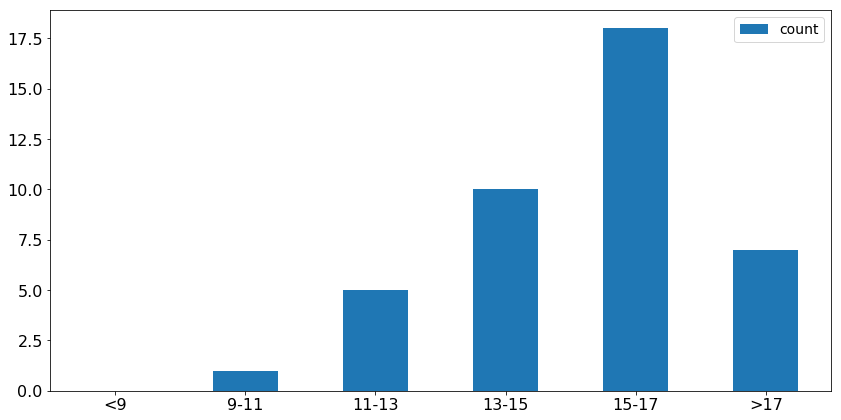

In [36]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'count': count1}, index=index)
ax = gra9.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#femaleg9B = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.best_pb_prediction))
#femaleg9M = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.mean_pb_prediction))

femaleg11B = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.best_pb_prediction))
femaleg11M = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.mean_pb_prediction))

femaleg13B = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.best_pb_prediction))
femaleg13M = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.mean_pb_prediction))

femaleg15B = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.best_pb_prediction))
femaleg15M = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.mean_pb_prediction))

femaleg17B = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.best_pb_prediction))
femaleg17M = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.mean_pb_prediction))

femaleg19B = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.best_pb_prediction))
femaleg19M = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.mean_pb_prediction))


#print('female U9 Best Error:', femaleg9B)
#print('female U9 Mean Error:', femaleg9M)
print('female 9-11 Best Error:', femaleg11B)
print('female 9-11 Mean Error:', femaleg11M)
print('female 11-13 Best Error:', femaleg13B)
print('female 11-13 Mean Error:', femaleg13M)
print('female 13-15 Best Error:', femaleg15B)
print('female 13-15 Mean Error:', femaleg15M)
print('female 15-17 Best Error:', femaleg17B)
print('female 15-17 Mean Error:', femaleg17M)
print('female O17 Best Error:', femaleg19B)
print('female 017 Mean Error:', femaleg19M)

female 9-11 Best Error: 0.07317218038163809
female 9-11 Mean Error: 3.2567713184230804
female 11-13 Best Error: 2.07550182430754
female 11-13 Mean Error: 1.946849093834769
female 13-15 Best Error: 3.503542420103559
female 13-15 Mean Error: 1.243553525225419
female 15-17 Best Error: 3.2019746031822556
female 15-17 Mean Error: 0.551359245543631
female O17 Best Error: 5.9116931526659195
female 017 Mean Error: 2.762256369002389


In [40]:
mean4 = [femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]

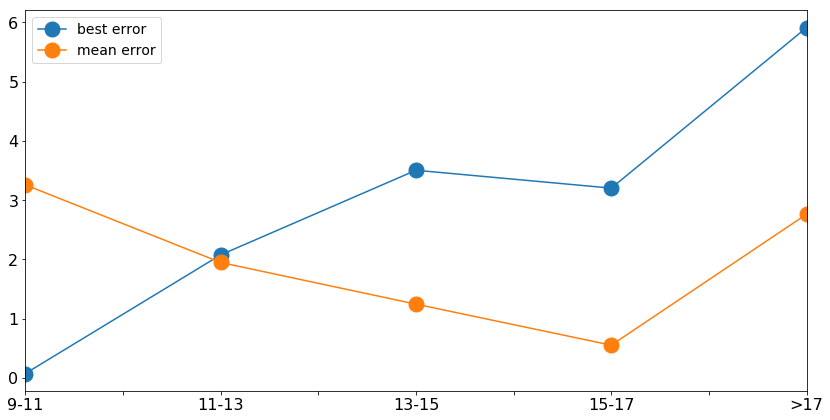

In [41]:
index = ['9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'mean error': mean4, 'best error': best4}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

In [140]:
index = ['9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'female mean error': mean4, 'male mean error': mean3, 'overall mean error': mean2}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

ValueError: could not broadcast input array from shape (6) into shape (5)

In [141]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra10 = pd.DataFrame({'female best error': best4, 'male best error': best3, 'overall best error': best2}, index=index)
ax = gra10.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

ValueError: could not broadcast input array from shape (6) into shape (5)

# Categorical Ability

## Senior Men Ability

In [50]:
sg9 = sen[(sen.query_pb <= 9)]
sg11 = sen[(sen.query_pb > 9) & (sen.query_pb <= 11)]
sg13 = sen[(sen.query_pb > 11) & (sen.query_pb <= 13)]
sg15 = sen[(sen.query_pb > 13) & (sen.query_pb <= 15)]
sg17 = sen[(sen.query_pb > 15) & (sen.query_pb <= 17)]
sg19 = sen[(sen.query_pb > 17)]

### Bin counts

In [51]:
sg9count = sg9.shape[0]
sg11count = sg11.shape[0]
sg13count = sg13.shape[0]
sg15count = sg15.shape[0]
sg17count = sg17.shape[0]
sg19count = sg19.shape[0]

In [52]:
count2 = [sg9count, sg11count, sg13count, sg15count, sg17count, sg19count]

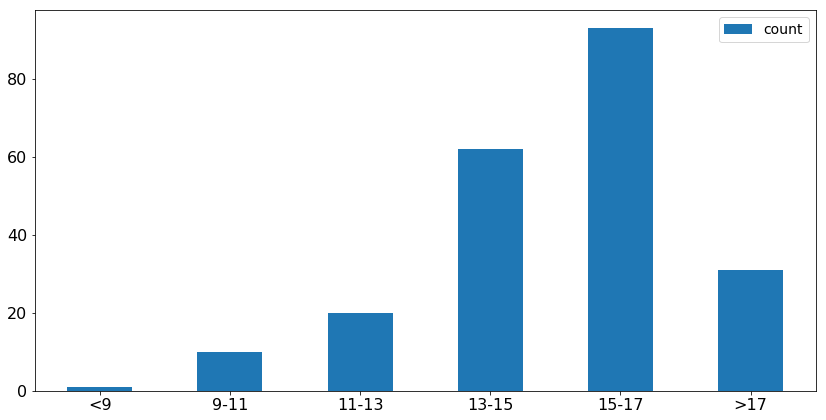

In [53]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count2}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sg9B = sqrt(mean_squared_error(sg9.query_pb, sg9.best_pb_prediction))
sg9M = sqrt(mean_squared_error(sg9.query_pb, sg9.mean_pb_prediction))

sg11B = sqrt(mean_squared_error(sg11.query_pb, sg11.best_pb_prediction))
sg11M = sqrt(mean_squared_error(sg11.query_pb, sg11.mean_pb_prediction))

sg13B = sqrt(mean_squared_error(sg13.query_pb, sg13.best_pb_prediction))
sg13M = sqrt(mean_squared_error(sg13.query_pb, sg13.mean_pb_prediction))

sg15B = sqrt(mean_squared_error(sg15.query_pb, sg15.best_pb_prediction))
sg15M = sqrt(mean_squared_error(sg15.query_pb, sg15.mean_pb_prediction))

sg17B = sqrt(mean_squared_error(sg17.query_pb, sg17.best_pb_prediction))
sg17M = sqrt(mean_squared_error(sg17.query_pb, sg17.mean_pb_prediction))

sg19B = sqrt(mean_squared_error(sg19.query_pb, sg19.best_pb_prediction))
sg19M = sqrt(mean_squared_error(sg19.query_pb, sg19.mean_pb_prediction))


print('Sen U9 Best Error:', sg9B)
print('Sen U9 Mean Error:', sg9M)
print('Sen 9-11 Best Error:', sg11B)
print('Sen 9-11 Mean Error:', sg11M)
print('Sen 11-13 Best Error:', sg13B)
print('Sen 11-13 Mean Error:', sg13M)
print('Sen 13-15 Best Error:', sg15B)
print('Sen 13-15 Mean Error:', sg15M)
print('Sen 15-17 Best Error:', sg17B)
print('Sen 15-17 Mean Error:', sg17M)
print('Sen O17 Best Error:', sg19B)
print('Sen 017 Mean Error:', sg19M)

Sen U9 Best Error: 0.08189412877722191
Sen U9 Mean Error: 2.981198642626728
Sen 9-11 Best Error: 1.4681504299843722
Sen 9-11 Mean Error: 2.5975563363619667
Sen 11-13 Best Error: 2.3643687388962884
Sen 11-13 Mean Error: 2.0957127832695686
Sen 13-15 Best Error: 3.0039801688967205
Sen 13-15 Mean Error: 1.3612622512713901
Sen 15-17 Best Error: 4.025102615341479
Sen 15-17 Mean Error: 1.0485155008283427
Sen O17 Best Error: 4.944720714422774
Sen 017 Mean Error: 2.0940889115431234


In [55]:
mean5 = [sg9M, sg11M, sg13M, sg15M, sg17M, sg19M]
best5 = [sg9B, sg11B, sg13B, sg15B, sg17B, sg19B]

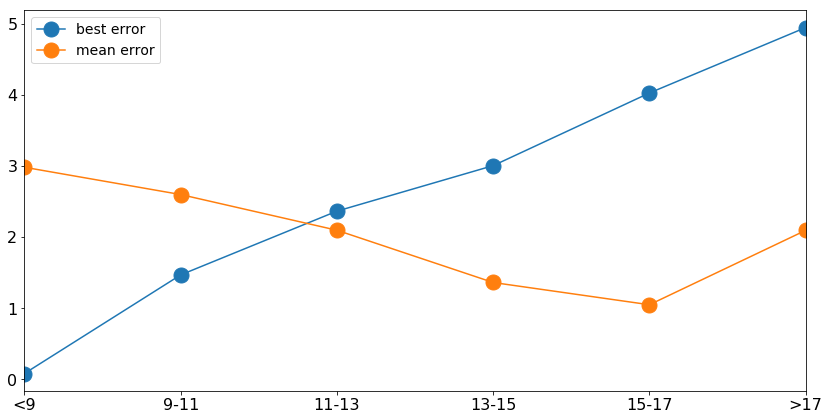

In [56]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra12 = pd.DataFrame({'mean error': mean5, 'best error': best5}, index=index)
ax = gra12.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 1 Ability

In [57]:
mg9 = mas[(mas.query_pb <= 9)]
mg11 = mas[(mas.query_pb > 9) & (mas.query_pb <= 11)]
mg13 = mas[(mas.query_pb > 11) & (mas.query_pb <= 13)]
mg15 = mas[(mas.query_pb > 13) & (mas.query_pb <= 15)]
mg17 = mas[(mas.query_pb > 15) & (mas.query_pb <= 17)]
mg19 = mas[(mas.query_pb > 17)]

### Bin counts

In [58]:
mg9count = mg9.shape[0]
mg11count = mg11.shape[0]
mg13count = mg13.shape[0]
mg15count = mg15.shape[0]
mg17count = mg17.shape[0]
mg19count = mg19.shape[0]

In [59]:
count3 = [mg9count, mg11count, mg13count, mg15count, mg17count, mg19count]

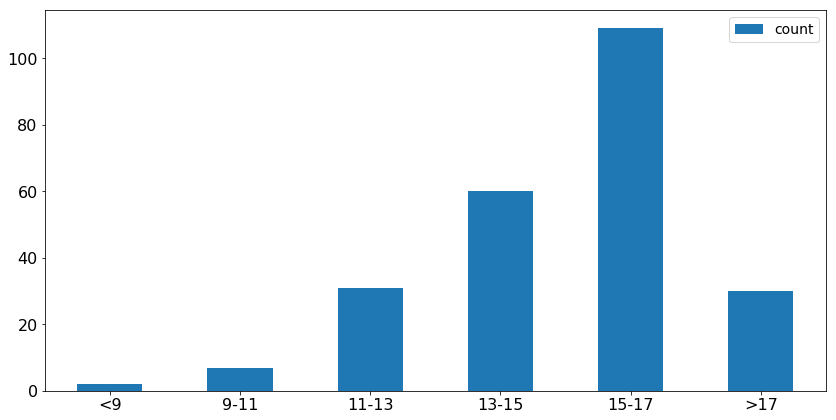

In [60]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mg9B = sqrt(mean_squared_error(mg9.query_pb, mg9.best_pb_prediction))
mg9M = sqrt(mean_squared_error(mg9.query_pb, mg9.mean_pb_prediction))

mg11B = sqrt(mean_squared_error(mg11.query_pb, mg11.best_pb_prediction))
mg11M = sqrt(mean_squared_error(mg11.query_pb, mg11.mean_pb_prediction))

mg13B = sqrt(mean_squared_error(mg13.query_pb, mg13.best_pb_prediction))
mg13M = sqrt(mean_squared_error(mg13.query_pb, mg13.mean_pb_prediction))

mg15B = sqrt(mean_squared_error(mg15.query_pb, mg15.best_pb_prediction))
mg15M = sqrt(mean_squared_error(mg15.query_pb, mg15.mean_pb_prediction))

mg17B = sqrt(mean_squared_error(mg17.query_pb, mg17.best_pb_prediction))
mg17M = sqrt(mean_squared_error(mg17.query_pb, mg17.mean_pb_prediction))

mg19B = sqrt(mean_squared_error(mg19.query_pb, mg19.best_pb_prediction))
mg19M = sqrt(mean_squared_error(mg19.query_pb, mg19.mean_pb_prediction))


print('Mas U9 Best Error:', mg9B)
print('Mas U9 Mean Error:', mg9M)
print('Mas 9-11 Best Error:', mg11B)
print('Mas 9-11 Mean Error:', mg11M)
print('Mas 11-13 Best Error:', mg13B)
print('Mas 11-13 Mean Error:', mg13M)
print('Mas 13-15 Best Error:', mg15B)
print('Mas 13-15 Mean Error:', mg15M)
print('Mas 15-17 Best Error:', mg17B)
print('Mas 15-17 Mean Error:', mg17M)
print('Mas O17 Best Error:', mg19B)
print('Mas 017 Mean Error:', mg19M)

Mas U9 Best Error: 0.22485780392592983
Mas U9 Mean Error: 2.4382400958340997
Mas 9-11 Best Error: 1.1379950489067707
Mas 9-11 Mean Error: 1.5107946938237395
Mas 11-13 Best Error: 2.6562034708460778
Mas 11-13 Mean Error: 1.922745481581389
Mas 13-15 Best Error: 3.2650930798080213
Mas 13-15 Mean Error: 1.4336522620327428
Mas 15-17 Best Error: 4.122878710223428
Mas 15-17 Mean Error: 1.05851378503705
Mas O17 Best Error: 5.602769347261135
Mas 017 Mean Error: 2.497850085286568


In [62]:
mean6 = [mg9M, mg11M, mg13M, mg15M, mg17M, mg19M]
best6 = [mg9B, mg11B, mg13B, mg15B, mg17B, mg19B]

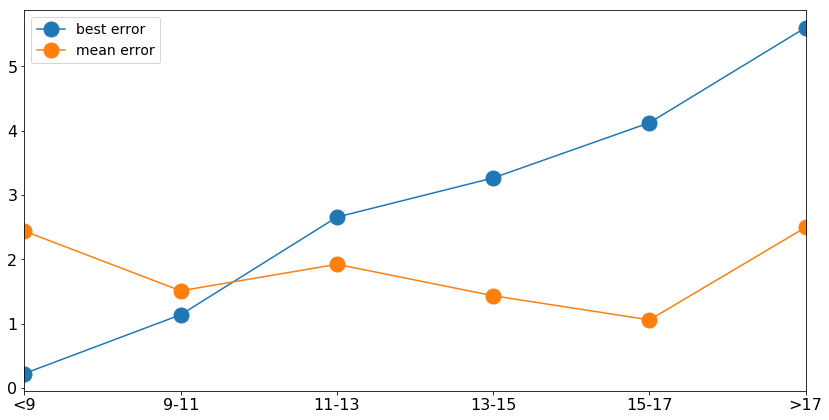

In [63]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra13 = pd.DataFrame({'mean error': mean6, 'best error': best6}, index=index)
ax = gra13.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 2 Ability

In [64]:
m2g9 = mas2[(mas2.query_pb <= 9)]
m2g11 = mas2[(mas2.query_pb > 9) & (mas2.query_pb <= 11)]
m2g13 = mas2[(mas2.query_pb > 11) & (mas2.query_pb <= 13)]
m2g15 = mas2[(mas2.query_pb > 13) & (mas2.query_pb <= 15)]
m2g17 = mas2[(mas2.query_pb > 15) & (mas2.query_pb <= 17)]
m2g19 = mas2[(mas2.query_pb > 17)]

### Bin counts

In [65]:
m2g9count = m2g9.shape[0]
m2g11count = m2g11.shape[0]
m2g13count = m2g13.shape[0]
m2g15count = m2g15.shape[0]
m2g17count = m2g17.shape[0]
m2g19count = m2g19.shape[0]

In [66]:
count3 = [m2g9count, m2g11count, m2g13count, m2g15count, m2g17count, m2g19count]

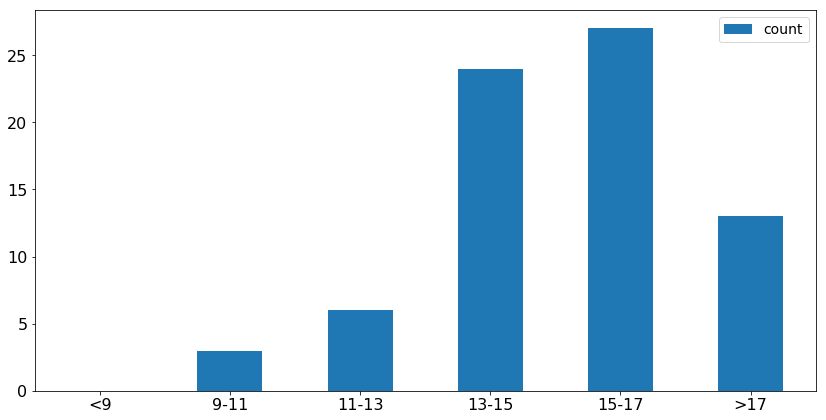

In [67]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [105]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#m2g9B = sqrt(mean_squared_error(m2g9.query_pb, m2g9.best_pb_prediction))
#m2g9M = sqrt(mean_squared_error(m2g9.query_pb, m2g9.mean_pb_prediction))

m2g11B = sqrt(mean_squared_error(m2g11.query_pb, m2g11.best_pb_prediction))
m2g11M = sqrt(mean_squared_error(m2g11.query_pb, m2g11.mean_pb_prediction))

m2g13B = sqrt(mean_squared_error(m2g13.query_pb, m2g13.best_pb_prediction))
m2g13M = sqrt(mean_squared_error(m2g13.query_pb, m2g13.mean_pb_prediction))

m2g15B = sqrt(mean_squared_error(m2g15.query_pb, m2g15.best_pb_prediction))
m2g15M = sqrt(mean_squared_error(m2g15.query_pb, m2g15.mean_pb_prediction))

m2g17B = sqrt(mean_squared_error(m2g17.query_pb, m2g17.best_pb_prediction))
m2g17M = sqrt(mean_squared_error(m2g17.query_pb, m2g17.mean_pb_prediction))

m2g19B = sqrt(mean_squared_error(m2g19.query_pb, m2g19.best_pb_prediction))
m2g19M = sqrt(mean_squared_error(m2g19.query_pb, m2g19.mean_pb_prediction))


#print('Mas2 U9 Best Error:', m2g9B)
#print('Mas2 U9 Mean Error:', m2g9M)
print('Mas2 9-11 Best Error:', m2g11B)
print('Mas2 9-11 Mean Error:', m2g11M)
print('Mas2 11-13 Best Error:', m2g13B)
print('Mas2 11-13 Mean Error:', m2g13M)
print('Mas2 13-15 Best Error:', m2g15B)
print('Mas2 13-15 Mean Error:', m2g15M)
print('Mas2 15-17 Best Error:', m2g17B)
print('Mas2 15-17 Mean Error:', m2g17M)
print('Mas2 O17 Best Error:', m2g19B)
print('Mas2 017 Mean Error:', m2g19M)

Mas2 9-11 Best Error: 2.0639423688673477
Mas2 9-11 Mean Error: 1.352558645721447
Mas2 11-13 Best Error: 2.3137279544559703
Mas2 11-13 Mean Error: 1.751408914541278
Mas2 13-15 Best Error: 2.5003394284473366
Mas2 13-15 Mean Error: 1.226903256744865
Mas2 15-17 Best Error: 3.8496716397035295
Mas2 15-17 Mean Error: 0.8385534337641463
Mas2 O17 Best Error: 4.984348354990374
Mas2 017 Mean Error: 1.6996314514369262


In [106]:
mean7 = [ m2g11M, m2g13M, m2g15M, m2g17M, m2g19M]
best7 = [ m2g11B, m2g13B, m2g15B, m2g17B, m2g19B]

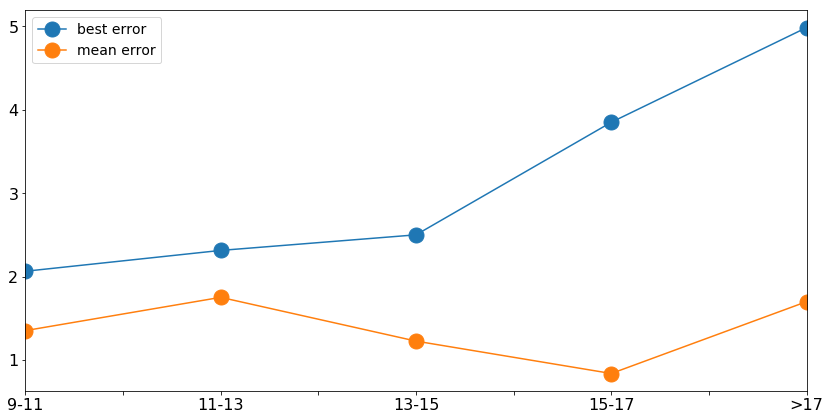

In [108]:
index = ['9-11', '11-13', '13-15', '15-17', '>17']
gra14 = pd.DataFrame({'mean error': mean7, 'best error': best7}, index=index)
ax = gra14.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 3 Ability

In [71]:
m3g9 = mas3[(mas3.query_pb <= 9)]
m3g11 = mas3[(mas3.query_pb > 9) & (mas3.query_pb <= 11)]
m3g13 = mas3[(mas3.query_pb > 11) & (mas3.query_pb <= 13)]
m3g15 = mas3[(mas3.query_pb > 13) & (mas3.query_pb <= 15)]
m3g17 = mas3[(mas3.query_pb > 15) & (mas3.query_pb <= 17)]
m3g19 = mas3[(mas3.query_pb > 17)]

### Bin counts

In [72]:
m3g9count = m3g9.shape[0]
m3g11count = m3g11.shape[0]
m3g13count = m3g13.shape[0]
m3g15count = m3g15.shape[0]
m3g17count = m3g17.shape[0]
m3g19count = m3g19.shape[0]

In [73]:
count4 = [m3g9count, m3g11count, m3g13count, m3g15count, m3g17count, m3g19count]

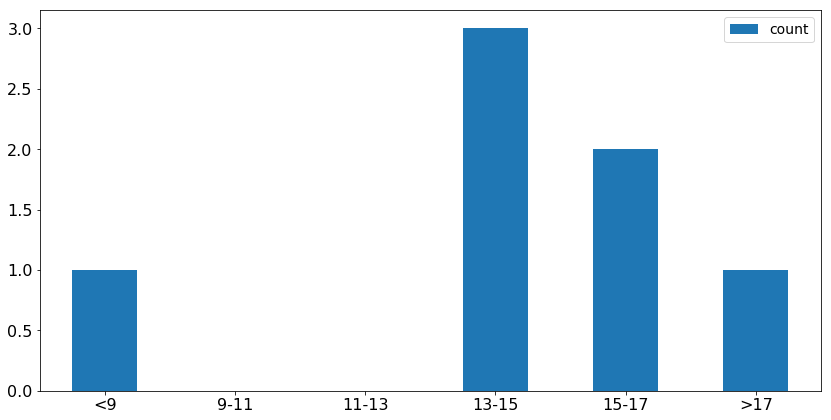

In [74]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count4}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [110]:
from sklearn.metrics import mean_squared_error
from math import sqrt

m3g9B = sqrt(mean_squared_error(m3g9.query_pb, m3g9.best_pb_prediction))
m3g9M = sqrt(mean_squared_error(m3g9.query_pb, m3g9.mean_pb_prediction))

#m3g11B = sqrt(mean_squared_error(m3g11.query_pb, m3g11.best_pb_prediction))
#m3g11M = sqrt(mean_squared_error(m3g11.query_pb, m3g11.mean_pb_prediction))

#m3g13B = sqrt(mean_squared_error(m3g13.query_pb, m3g13.best_pb_prediction))
#m3g13M = sqrt(mean_squared_error(m3g13.query_pb, m3g13.mean_pb_prediction))

m3g15B = sqrt(mean_squared_error(m3g15.query_pb, m3g15.best_pb_prediction))
m3g15M = sqrt(mean_squared_error(m3g15.query_pb, m3g15.mean_pb_prediction))

m3g17B = sqrt(mean_squared_error(m3g17.query_pb, m3g17.best_pb_prediction))
m3g17M = sqrt(mean_squared_error(m3g17.query_pb, m3g17.mean_pb_prediction))

m3g19B = sqrt(mean_squared_error(m3g19.query_pb, m3g19.best_pb_prediction))
m3g19M = sqrt(mean_squared_error(m3g19.query_pb, m3g19.mean_pb_prediction))


print('Mas3 U9 Best Error:', m3g9B)
print('Mas3 U9 Mean Error:', m3g9M)
#print('Mas3 9-11 Best Error:', m3g11B)
#print('Mas3 9-11 Mean Error:', m3g11M)
#print('Mas3 11-13 Best Error:', m3g13B)
#print('Mas3 11-13 Mean Error:', m3g13M)
print('Mas3 13-15 Best Error:', m3g15B)
print('Mas3 13-15 Mean Error:', m3g15M)
print('Mas3 15-17 Best Error:', m3g17B)
print('Mas3 15-17 Mean Error:', m3g17M)
print('Mas3 O17 Best Error:', m3g19B)
print('Mas3 017 Mean Error:', m3g19M)

Mas3 U9 Best Error: 0.25502735433220636
Mas3 U9 Mean Error: 2.809097045352102
Mas3 13-15 Best Error: 0.7081930520705899
Mas3 13-15 Mean Error: 1.7516836063337538
Mas3 15-17 Best Error: 4.157979081816103
Mas3 15-17 Mean Error: 0.8531876844785249
Mas3 O17 Best Error: 5.076570401348656
Mas3 017 Mean Error: 1.9712014179429733


In [111]:
mean8 = [m3g9M, m3g15M, m3g17M, m3g19M]
best8 = [m3g9B, m3g15B, m3g17B, m3g19B]

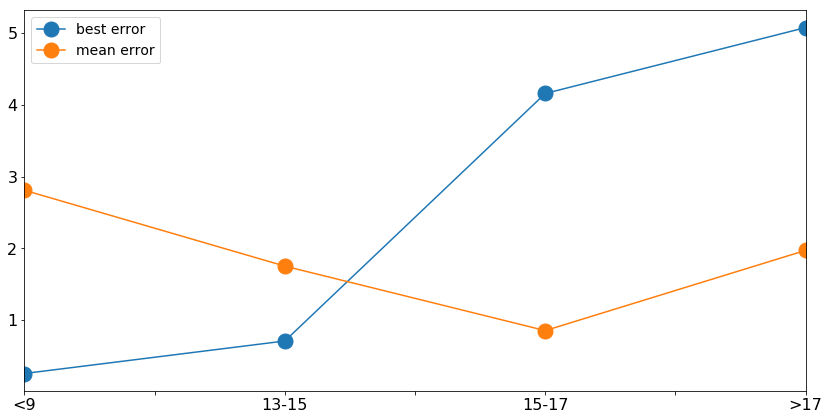

In [112]:
index = ['<9', '13-15', '15-17', '>17']
gra15 = pd.DataFrame({'mean error': mean8, 'best error': best8}, index=index)
ax = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 1 Ability

In [113]:
w1g9 = wom1[(wom1.query_pb <= 9)]
w1g11 = wom1[(wom1.query_pb > 9) & (wom1.query_pb <= 11)]
w1g13 = wom1[(wom1.query_pb > 11) & (wom1.query_pb <= 13)]
w1g15 = wom1[(wom1.query_pb > 13) & (wom1.query_pb <= 15)]
w1g17 = wom1[(wom1.query_pb > 15) & (wom1.query_pb <= 17)]
w1g19 = wom1[(wom1.query_pb > 17)]

### Bin counts

In [114]:
w1g9count = w1g9.shape[0]
w1g11count = w1g11.shape[0]
w1g13count = w1g13.shape[0]
w1g15count = w1g15.shape[0]
w1g17count = w1g17.shape[0]
w1g19count = w1g19.shape[0]

In [115]:
count5 = [w1g9count, w1g11count, w1g13count, w1g15count, w1g17count, w1g19count]

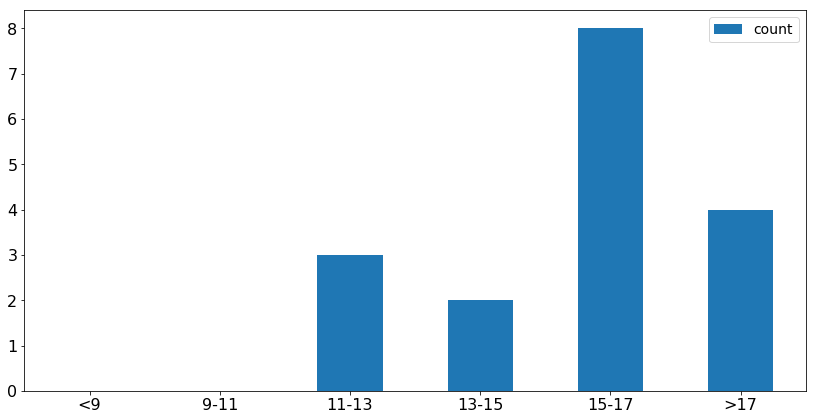

In [116]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count5}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#w1g9B = sqrt(mean_squared_error(w1g9.query_pb, w1g9.best_pb_prediction))
#w1g9M = sqrt(mean_squared_error(w1g9.query_pb, w1g9.mean_pb_prediction))

#w1g11B = sqrt(mean_squared_error(w1g11.query_pb, w1g11.best_pb_prediction))
#w1g11M = sqrt(mean_squared_error(w1g11.query_pb, w1g11.mean_pb_prediction))

w1g13B = sqrt(mean_squared_error(w1g13.query_pb, w1g13.best_pb_prediction))
w1g13M = sqrt(mean_squared_error(w1g13.query_pb, w1g13.mean_pb_prediction))

w1g15B = sqrt(mean_squared_error(w1g15.query_pb, w1g15.best_pb_prediction))
w1g15M = sqrt(mean_squared_error(w1g15.query_pb, w1g15.mean_pb_prediction))

w1g17B = sqrt(mean_squared_error(w1g17.query_pb, w1g17.best_pb_prediction))
w1g17M = sqrt(mean_squared_error(w1g17.query_pb, w1g17.mean_pb_prediction))

w1g19B = sqrt(mean_squared_error(w1g19.query_pb, w1g19.best_pb_prediction))
w1g19M = sqrt(mean_squared_error(w1g19.query_pb, w1g19.mean_pb_prediction))


#print('Wom1 U9 Best Error:', w1g9B)
#print('Wom1 U9 Mean Error:', w1g9M)
#print('Wom1 9-11 Best Error:', w1g11B)
#print('Wom1 9-11 Mean Error:', w1g11M)
print('Wom1 11-13 Best Error:', w1g13B)
print('Wom1 11-13 Mean Error:', w1g13M)
print('Wom1 13-15 Best Error:', w1g15B)
print('Wom1 13-15 Mean Error:', w1g15M)
print('Wom1 15-17 Best Error:', w1g17B)
print('Wom1 15-17 Mean Error:', w1g17M)
print('Wom1 O17 Best Error:', w1g19B)
print('Wom1 017 Mean Error:', w1g19M)

Wom1 11-13 Best Error: 2.5927948931682323
Wom1 11-13 Mean Error: 1.463715795868834
Wom1 13-15 Best Error: 3.8611609311954087
Wom1 13-15 Mean Error: 1.6292192377303572
Wom1 15-17 Best Error: 2.726935295828809
Wom1 15-17 Mean Error: 0.5176039214234547
Wom1 O17 Best Error: 6.029132262305411
Wom1 017 Mean Error: 2.817437768509031


In [119]:
mean9 = [w1g13M, w1g15M, w1g17M, w1g19M]
best9 = [w1g13B, w1g15B, w1g17B, w1g19B]

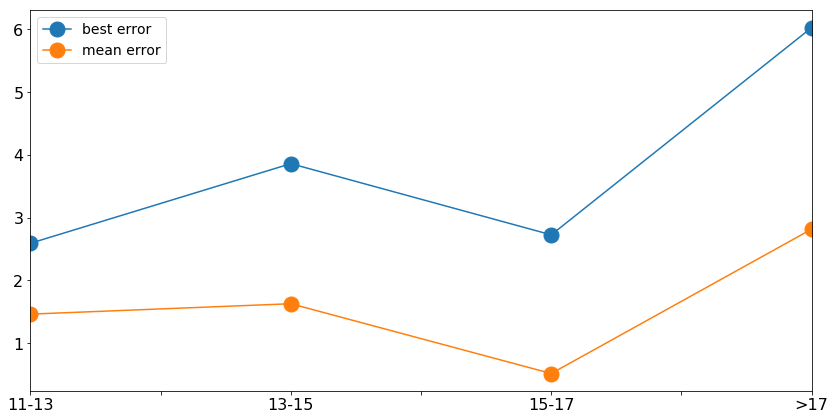

In [120]:
index = ['11-13', '13-15', '15-17', '>17']
gra16 = pd.DataFrame({'mean error': mean9, 'best error': best9}, index=index)
ax = gra16.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 2 Ability

In [121]:
w2g9 = wom2[(wom2.query_pb <= 9)]
w2g11 = wom2[(wom2.query_pb > 9) & (wom2.query_pb <= 11)]
w2g13 = wom2[(wom2.query_pb > 11) & (wom2.query_pb <= 13)]
w2g15 = wom2[(wom2.query_pb > 13) & (wom2.query_pb <= 15)]
w2g17 = wom2[(wom2.query_pb > 15) & (wom2.query_pb <= 17)]
w2g19 = wom2[(wom2.query_pb > 17)]

### Bin counts

In [122]:
w2g9count = w2g9.shape[0]
w2g11count = w2g11.shape[0]
w2g13count = w2g13.shape[0]
w2g15count = w2g15.shape[0]
w2g17count = w2g17.shape[0]
w2g19count = w2g19.shape[0]

In [123]:
count6 = [w2g9count, w2g11count, w2g13count, w2g15count, w2g17count, w2g19count]

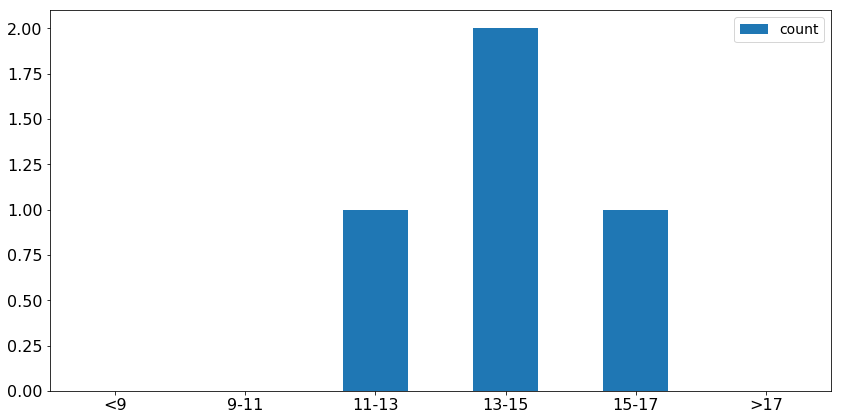

In [124]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count6}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [125]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#w2g9B = sqrt(mean_squared_error(w2g9.query_pb, w2g9.best_pb_prediction))
#w2g9M = sqrt(mean_squared_error(w2g9.query_pb, w2g9.mean_pb_prediction))

#w2g11B = sqrt(mean_squared_error(w2g11.query_pb, w2g11.best_pb_prediction))
#w2g11M = sqrt(mean_squared_error(w2g11.query_pb, w2g11.mean_pb_prediction))

w2g13B = sqrt(mean_squared_error(w2g13.query_pb, w2g13.best_pb_prediction))
w2g13M = sqrt(mean_squared_error(w2g13.query_pb, w2g13.mean_pb_prediction))

w2g15B = sqrt(mean_squared_error(w2g15.query_pb, w2g15.best_pb_prediction))
w2g15M = sqrt(mean_squared_error(w2g15.query_pb, w2g15.mean_pb_prediction))

w2g17B = sqrt(mean_squared_error(w2g17.query_pb, w2g17.best_pb_prediction))
w2g17M = sqrt(mean_squared_error(w2g17.query_pb, w2g17.mean_pb_prediction))

#w2g19B = sqrt(mean_squared_error(w2g19.query_pb, w2g19.best_pb_prediction))
#w2g19M = sqrt(mean_squared_error(w2g19.query_pb, w2g19.mean_pb_prediction))


#print('Wom2 U9 Best Error:', w2g9B)
#print('Wom2 U9 Mean Error:', w2g9M)
#print('Wom2 9-11 Best Error:', w2g11B)
#print('Wom2 9-11 Mean Error:', w2g11M)
print('Wom2 11-13 Best Error:', w2g13B)
print('Wom2 11-13 Mean Error:', w2g13M)
print('Wom2 13-15 Best Error:', w2g15B)
print('Wom2 13-15 Mean Error:', w2g15M)
print('Wom2 15-17 Best Error:', w2g17B)
print('Wom2 15-17 Mean Error:', w2g17M)
#print('Wom2 O17 Best Error:', w2g19B)
#print('Wom2 017 Mean Error:', w2g19M)

Wom2 11-13 Best Error: 1.1513258131056023
Wom2 11-13 Mean Error: 2.33526950344301
Wom2 13-15 Best Error: 4.048365459272759
Wom2 13-15 Mean Error: 0.8492565920666828
Wom2 15-17 Best Error: 1.0445912219629747
Wom2 15-17 Mean Error: 0.5587517036995084


In [126]:
mean10 = [w2g13M, w2g15M, w2g17M]
best10 = [w2g13B, w2g15B, w2g17B]

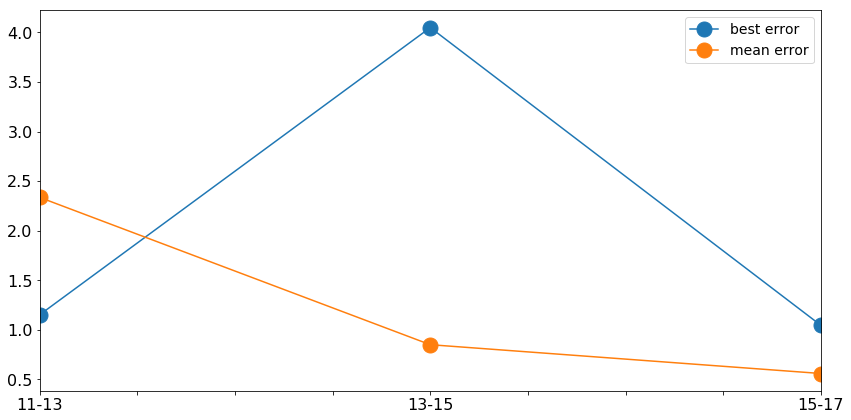

In [127]:
index = ['11-13', '13-15', '15-17']
gra18 = pd.DataFrame({'mean error': mean10, 'best error': best10}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Senior Women Ability

In [128]:
sw9 = senW[(senW.query_pb <= 9)]
sw11 = senW[(senW.query_pb > 9) & (senW.query_pb <= 11)]
sw13 = senW[(senW.query_pb > 11) & (senW.query_pb <= 13)]
sw15 = senW[(senW.query_pb > 13) & (senW.query_pb <= 15)]
sw17 = senW[(senW.query_pb > 15) & (senW.query_pb <= 17)]
sw19 = senW[(senW.query_pb > 17)]

### Bin counts

In [129]:
sw9count = sw9.shape[0]
sw11count = sw11.shape[0]
sw13count = sw13.shape[0]
sw15count = sw15.shape[0]
sw17count = sw17.shape[0]
sw19count = sw19.shape[0]

In [130]:
count7 = [sw9count, sw11count, sw13count, sw15count, sw17count, sw19count]

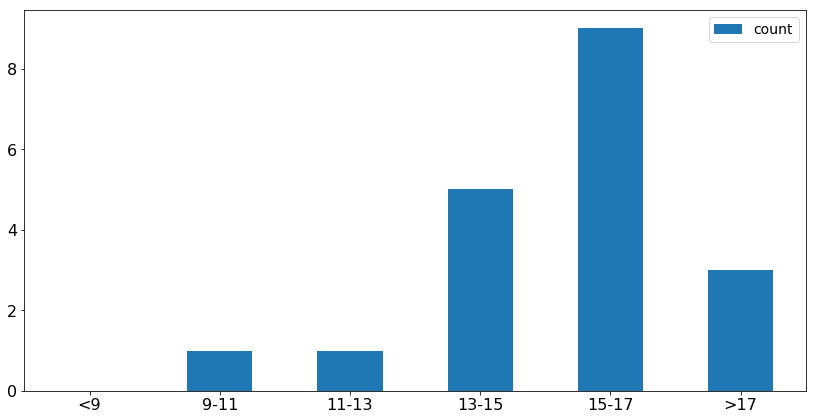

In [131]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count7}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [132]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#sw9B = sqrt(mean_squared_error(sw9.query_pb, sw9.best_pb_prediction))
#sw9M = sqrt(mean_squared_error(sw9.query_pb, sw9.mean_pb_prediction))

sw11B = sqrt(mean_squared_error(sw11.query_pb, sw11.best_pb_prediction))
sw11M = sqrt(mean_squared_error(sw11.query_pb, sw11.mean_pb_prediction))

sw13B = sqrt(mean_squared_error(sw13.query_pb, sw13.best_pb_prediction))
sw13M = sqrt(mean_squared_error(sw13.query_pb, sw13.mean_pb_prediction))

sw15B = sqrt(mean_squared_error(sw15.query_pb, sw15.best_pb_prediction))
sw15M = sqrt(mean_squared_error(sw15.query_pb, sw15.mean_pb_prediction))

sw17B = sqrt(mean_squared_error(sw17.query_pb, sw17.best_pb_prediction))
sw17M = sqrt(mean_squared_error(sw17.query_pb, sw17.mean_pb_prediction))

sw19B = sqrt(mean_squared_error(sw19.query_pb, sw19.best_pb_prediction))
sw19M = sqrt(mean_squared_error(sw19.query_pb, sw19.mean_pb_prediction))


#print('Senior Women U9 Best Error:', sw9B)
#print('Senior Women U9 Mean Error:', sw9M)
print('Senior Women 9-11 Best Error:', sw11B)
print('Senior Women 9-11 Mean Error:', sw11M)
print('Senior Women 11-13 Best Error:', sw13B)
print('Senior Women 11-13 Mean Error:', sw13M)
print('Senior Women 13-15 Best Error:', sw15B)
print('Senior Women 13-15 Mean Error:', sw15M)
print('Senior Women 15-17 Best Error:', sw17B)
print('Senior Women 15-17 Mean Error:', sw17M)
print('Senior Women O17 Best Error:', sw19B)
print('Senior Women 017 Mean Error:', sw19M)

Senior Women 9-11 Best Error: 0.07317218038163809
Senior Women 9-11 Mean Error: 3.2567713184230804
Senior Women 11-13 Best Error: 0.2126779524975717
Senior Women 11-13 Mean Error: 2.658990696465022
Senior Women 13-15 Best Error: 2.940724328323015
Senior Women 13-15 Mean Error: 1.3198417777663989
Senior Women 15-17 Best Error: 3.7113484340082166
Senior Women 15-17 Mean Error: 0.5789293082411656
Senior Women O17 Best Error: 5.7513786223667545
Senior Women 017 Mean Error: 2.686918893390423


In [133]:
mean11 = [ sw11M, sw13M, sw15M, sw17M, sw19M]
best11 = [ sw11B, sw13B, sw15B, sw17B, sw19B]

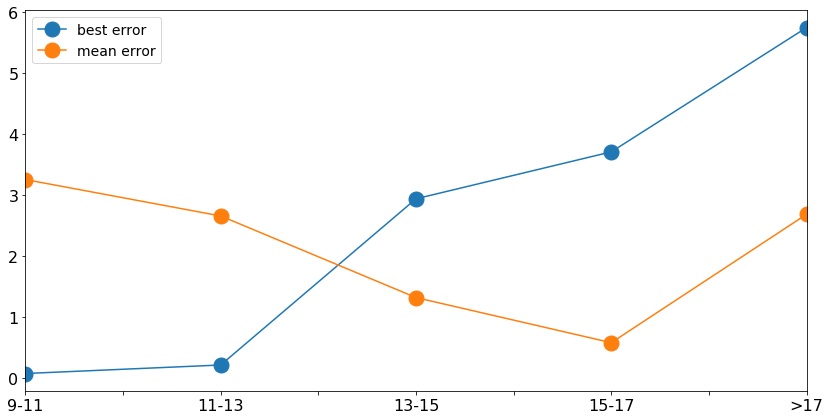

In [134]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra18 = pd.DataFrame({'mean error': mean11, 'best error': best11}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Youth Men Ability

In [135]:
you9 = you[(you.query_pb <= 9)]
you11 = you[(you.query_pb > 9) & (you.query_pb <= 11)]
you13 = you[(you.query_pb > 11) & (you.query_pb <= 13)]
you15 = you[(you.query_pb > 13) & (you.query_pb <= 15)]
you17 = you[(you.query_pb > 15) & (you.query_pb <= 17)]
you19 = you[(you.query_pb > 17)]

### Bin counts

In [136]:
you9count = you9.shape[0]
you11count = you11.shape[0]
you13count = you13.shape[0]
you15count = you15.shape[0]
you17count = you17.shape[0]
you19count = you19.shape[0]

In [137]:
count8 = [you9count, you11count, you13count, you15count, you17count, you19count]

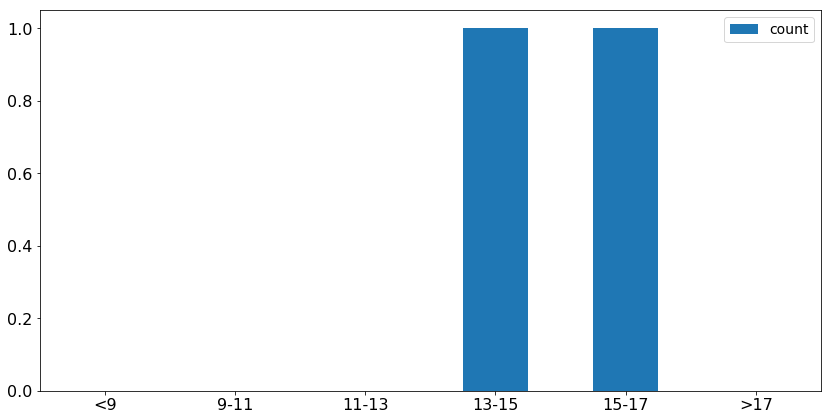

In [138]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count8}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [139]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#you9B = sqrt(mean_squared_error(you9.query_pb, you9.best_pb_prediction))
#you9M = sqrt(mean_squared_error(you9.query_pb, you9.mean_pb_prediction))

#you11B = sqrt(mean_squared_error(you11.query_pb, you11.best_pb_prediction))
#you11M = sqrt(mean_squared_error(you11.query_pb, you11.mean_pb_prediction))

#you13B = sqrt(mean_squared_error(you13.query_pb, you13.best_pb_prediction))
#you13M = sqrt(mean_squared_error(you13.query_pb, you13.mean_pb_prediction))

you15B = sqrt(mean_squared_error(you15.query_pb, you15.best_pb_prediction))
you15M = sqrt(mean_squared_error(you15.query_pb, you15.mean_pb_prediction))

you17B = sqrt(mean_squared_error(you17.query_pb, you17.best_pb_prediction))
you17M = sqrt(mean_squared_error(you17.query_pb, you17.mean_pb_prediction))

#you19B = sqrt(mean_squared_error(you19.query_pb, you19.best_pb_prediction))
#you19M = sqrt(mean_squared_error(you19.query_pb, you19.mean_pb_prediction))


#print('Youth Men U9 Best Error:', you9B)
#print('Youth Men U9 Mean Error:', you9M)
#print('Youth Men 9-11 Best Error:', you11B)
#print('Youth Men 9-11 Mean Error:', you11M)
#print('Youth Men 11-13 Best Error:', you13B)
#print('Youth Men 11-13 Mean Error:', you13M)
print('Youth Men 13-15 Best Error:', you15B)
print('Youth Men 13-15 Mean Error:', you15M)
print('Youth Men 15-17 Best Error:', you17B)
print('Youth Men 15-17 Mean Error:', you17M)
#print('Youth Men O17 Best Error:', you19B)
#print('Youth Men 017 Mean Error:', you19M)

Youth Men 13-15 Best Error: 3.4370983599539926
Youth Men 13-15 Mean Error: 1.7785551594689224
Youth Men 15-17 Best Error: 2.690737833360094
Youth Men 15-17 Mean Error: 0.284391751246865
